In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Say we have a dataframe with lots of brands:
(or other values you want to plot in a pie chart)

In [22]:
df = pd.read_csv('ebay_cars.csv',index_col=0)
df

,brand,price
0,peugeot,5000.0
1,bmw,8500.0
2,volkswagen,8990.0
3,smart,4350.0
4,ford,1350.0
...,...,...
49995,audi,24900.0
49996,opel,1980.0
49997,fiat,13200.0
49998,audi,22900.0


# We want to plot a nice pie chart:

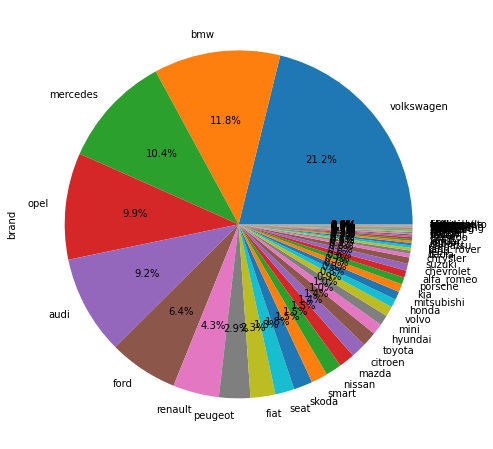

In [20]:
plt.subplots(figsize =(12, 8))
df["brand"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

# And it looks terrible!

# Solution:
It's not that hard, we just have to make a copy of the dataframe. Then change the brand name in every entry that's not in the top_10 or in top_whatever_number_you_like_as_long_as_it_looks_good.

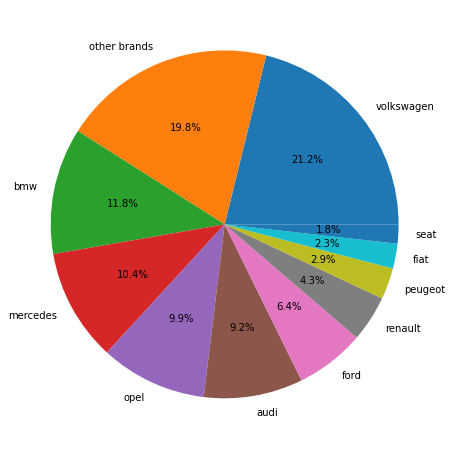

In [26]:
# Lets create an empty dataframe:
pie_frame = pd.DataFrame()
# Copy the contents of brand column:
pie_frame['brand'] = df["brand"]

# Create a list of all the brands that are NOT in the 10 most popular brands:
# Remember you can change that number to whatever you like!
others = pie_frame['brand'].value_counts()[10:].index  # <-- Notice the [10:] after value_counts!
# Now lets change the value of brand column for every entry that is in the 'others' list
pie_frame.loc[pie_frame['brand'].isin(others),'brand'] = 'other brands'


# Make the size big enough:
plt.subplots(figsize =(12, 8))
# Plot it:
pie_frame["brand"].value_counts().plot.pie( autopct='%1.1f%%')
# Remove the Y label:
plt.ylabel("")
plt.show()

# Looks better? Remember to change the color
It's always a good idea to change the color of 'other brands' to something grayish, while the rest is colorful.

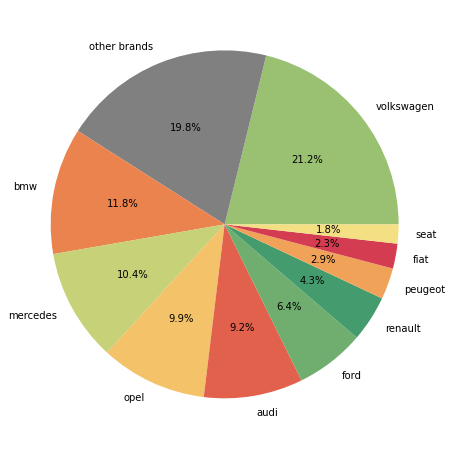

In [29]:
# We have plotted the pie chart once already, so we know the 'other brands' is in second position, lets
# change the color of second slice to grey, set colors for other slices as well:
colors = ['#9ac071', 'grey', '#eb834f', '#c6d178', '#f3c269', '#e2614d',
          '#70ae6f', '#449b6d', '#f0a358', '#d43d51', '#f4e083']
plt.subplots(figsize =(12, 8))
pie_frame["brand"].value_counts().plot.pie(colors=colors, autopct='%1.1f%%')
plt.ylabel("")
plt.show()

# Voila
Now you can do the same with any columns you like in your dataframe.